In [ ]:
!pip install pmdarima --quiet
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.1 MB/s eta 0:00:00


In [ ]:
import gdown

file_id = '1hX2-KzS0nwyEuhi9dWy22PzRUczXVpn7'
url = f'https://drive.google.com/uc?id={file_id}'
sales_df = 'Orders Table.csv'

gdown.download(url, sales_df, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1hX2-KzS0nwyEuhi9dWy22PzRUczXVpn7
To: /content/Orders Table.csv
100%|██████████| 18.8M/18.8M [00:00<00:00, 66.3MB/s]


'Orders Table.csv'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
sales_df = pd.read_csv(sales_df)
sales_df = sales_df.drop(['Unnamed: 0'], axis = 1)
sales_df = sales_df.set_index('ProductID')
# sales_df['Promotional Period'] = np.random.choice(a = [0,1], p = [0.8, 0.2], size=len(sales_df))
sales_df.head(10)
# sales_df.to_csv('Orders Table.csv')

,OrderID,CustomerID,Order Date,Shipping Date,Actual days for shipping,Scheduled days for shipping,Late Delivery Risk,Discount Percentage,Returns,Promotional Period,Order Region,Order State,Order Item Quantity,Order Country
ProductID,,,,,,,,,,,,,,
5246,77202,15795,1/31/2018 22:56,2/3/18 22:56,3,4,0,0.04,0,0,Southeast Asia,Java Occidental,1,Indonesia
2362,75939,860,1/13/2018 12:27,1/18/2018 12:27,5,4,1,0.05,1,1,South Asia,Rajastán,1,India
13940,75938,76820,1/13/2018 12:06,1/17/2018 12:06,4,4,0,0.06,0,0,South Asia,Rajastán,1,India
1105,75937,54886,1/13/2018 11:45,1/16/2018 11:45,3,4,0,0.07,0,1,Oceania,Queensland,1,Australia
2987,75936,6265,1/13/2018 11:24,1/15/2018 11:24,2,4,0,0.09,0,1,Oceania,Queensland,1,Australia
285,75935,82386,1/13/2018 11:03,1/19/2018 11:03,6,4,0,0.10,0,1,Oceania,Queensland,1,Australia
10276,75934,37194,1/13/2018 10:42,1/15/2018 10:42,2,1,1,0.12,0,1,Eastern Asia,Guangdong,1,China
4506,75933,87498,1/13/2018 10:21,1/15/2018 10:21,2,1,1,0.13,0,1,Eastern Asia,Guangdong,1,China
16345,75932,44131,1/13/2018 10:00,1/16/2018 10:00,3,2,1,0.15,0,1,Eastern Asia,Guangdong,1,China


In [ ]:
### EDA
df = sales_df

# split Order Date column into Date and Time columns
df[['Order Date', 'Order Time']] = df['Order Date'].str.split(' ', expand=True)

# convert Date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')

# extract month from Date
df['Month'] = df['Order Date'].dt.strftime('%b')

# drop day and time from Order Date column
df['Year-Month'] = df['Order Date'].dt.strftime('%Y-%m')

# drop unused columns
df = df.drop(['CustomerID', 'OrderID'], axis = 1)

# normalise Sales column
# df['log_sales'] = np.log(df['Sales'])
# df['scaled_sales'] = np.log(df['Sales'] / df['Product Price'])

# sort by date
df = df.sort_values('Order Date')

df.head(10)

,Order Date,Shipping Date,Actual days for shipping,Scheduled days for shipping,Late Delivery Risk,Discount Percentage,Returns,Promotional Period,Order Region,Order State,Order Item Quantity,Order Country,Order Time,Month,Year-Month
ProductID,,,,,,,,,,,,,,,
6598,2015-01-01,1/3/15 12:15,2,2,0,0.06,0,0,Central America,Morelos,4,México,12:15,Jan,2015-01
1282,2015-01-01,1/4/15 3:51,3,4,0,0.02,0,0,Eastern Asia,Shanghái,1,China,3:51,Jan,2015-01
14813,2015-01-01,1/4/15 3:51,3,4,0,0.07,0,1,South Asia,Punyab,5,Pakistán,3:51,Jan,2015-01
7742,2015-01-01,1/7/15 17:10,6,4,0,0.03,0,1,Southern Europe,Lombardía,1,Italia,17:10,Jan,2015-01
10556,2015-01-01,1/7/15 15:24,6,4,1,0.16,0,1,South Asia,Uttar Pradesh,1,India,15:24,Jan,2015-01
4894,2015-01-01,1/3/15 14:42,2,1,1,0.03,0,0,Central America,San Salvador,1,El Salvador,14:42,Jan,2015-01
11945,2015-01-01,1/4/15 19:37,3,4,0,0.25,0,1,Southern Europe,Ceuta,4,España,19:37,Jan,2015-01
5523,2015-01-01,1/7/15 1:24,6,4,1,0.16,0,0,Central America,San Salvador,5,El Salvador,1:24,Jan,2015-01
17383,2015-01-01,1/3/15 22:04,2,1,1,0.16,1,0,Southeast Asia,Capital Nacional,4,Filipinas,22:04,Jan,2015-01


In [ ]:
date = df['Year-Month'].unique()
sales = df.groupby('Year-Month').size()

df1 = np.array([date, sales])

In [ ]:
pred_date = np.arange(np.datetime64("2018-02"), np.datetime64("2019-01"), np.timedelta64(1, "M"))

In [ ]:
pred_date = pd.to_datetime(pred_date, format='%Y-%m')

In [ ]:
pred_date = pred_date.strftime('%Y-%m')

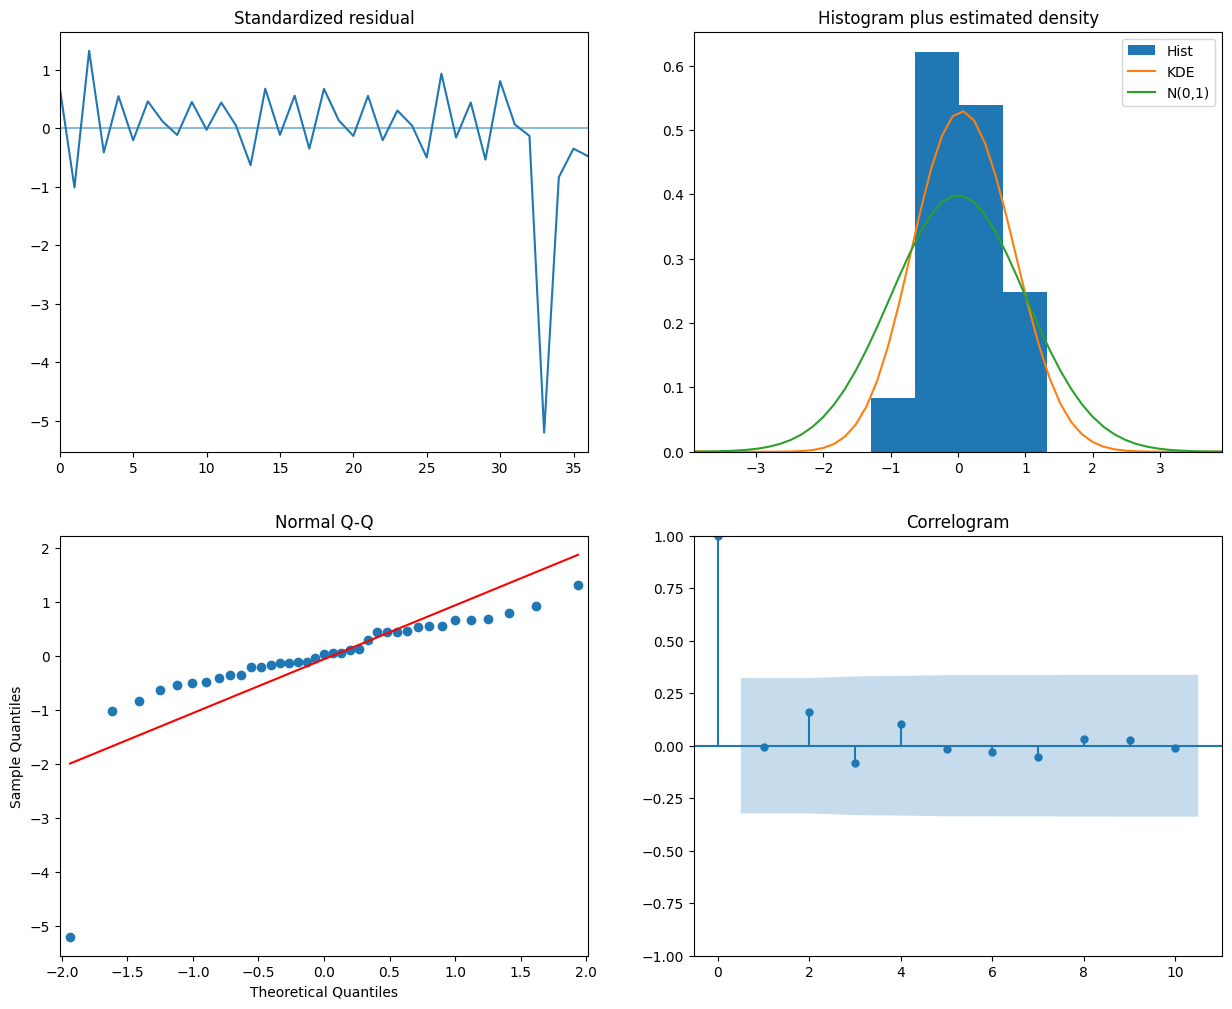

In [ ]:
SARIMA_model = pm.auto_arima(df1[1], seasonal=True, #set to seasonal
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

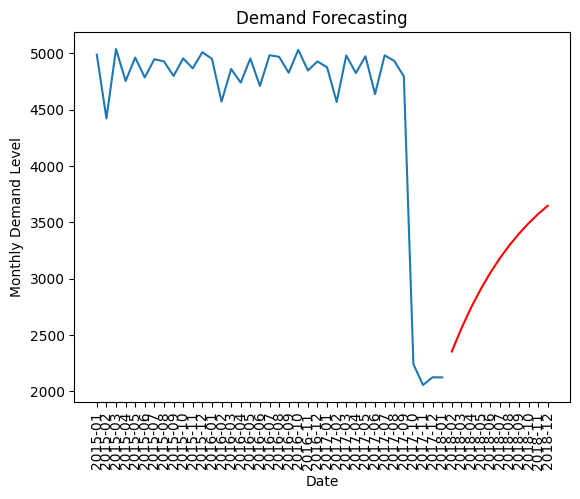

In [ ]:
pred = SARIMA_model.predict(len(pred_date))

plt.plot(date, sales, label='Train')
plt.plot(pred_date, pred, label='Forecast', color='red')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Monthly Demand Level')
plt.title('Demand Forecasting')
plt.show()